<a href="https://colab.research.google.com/github/DrewRust/DS-Unit-2-Applied-Modeling/blob/master/U2S3M3_PlanetProjectModel_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Andrew Rust

Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---

# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 

**Explored below**

- [ ] For the evaluation metric you chose, what score would you get just by guessing?

**0.5374645605508303**

- [ ] Can you make a fast, first model that beats guessing?

**Validation accuracy: 0.6202916160388822**

We recommend that you use your portfolio project dataset for all assignments this sprint.

But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment. Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

https://lambdaschool.github.io/ds/unit2/portfolio-project/dspt6


In [2]:
import pandas as pd
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = "https://raw.githubusercontent.com/DrewRust/Kepler_Planet_data/master/AllPlanets.csv"
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
allPlanets_df = pd.read_csv(DATA_PATH)  

In [0]:
def wrangle(dataframe):
    
    # Prevent SettingWithCopyWarning
    dataframe = dataframe.copy()

    dataframe = dataframe[['soltype', # target
                           'pl_name', # planet name
                           'hostname', # star name
                           'pl_letter', # b is the most common for b being next to a the star
                           'sy_snum', # number of stars in the planetary system
                           'sy_pnum', # number of planets in the planetary system
                           'discoverymethod', # transit is the most common categorical (11)
                           'disc_locale', # location of observation of planet discovery (ground or space (23,000 maj))
                           'pl_orbper', # Time the planet takes to make a complete orbit around the host star or system
                           'pl_rade', # planet radius in earth radii
                           'pl_radj', # planet radius in jupiter radii
                           'pl_eqt', # planet equilibrium temperature
                           'pl_insol', # insolotion flux
                           'pl_tranmid', # Time of Conjuction (Transit Midpoint) [days]
                           'pl_imppar', # sky projected distance between the center of the stellar disc and planet disc
                           'pl_trandep', # flux caused by transit of planet eclipsing star
                           'pl_trandurd', # transit duration 
                           'pl_ratdor', # ratio of the distance between the planet and the star at mid-transit divided by the stellar radius.
                           'pl_ratror', # ratio of planet to stellar radius
                           'st_teff', # stellar temperature
                           'st_rad', # stellar radius
                           'st_mass', # stellar mass
                           'st_met', # metallicity compared to hydrogen content
                           'st_metratio', # categorical metal content
                           'st_logg', # gravitational acceleration experienced at star surface
                           'ra', # east and west
                           'dec', # north and south
                           'sy_pm', # total proper motion change
                           'sy_dist', # Distance to the planetary system in units of parsecs
                           'sy_plx', # Difference in the angular position two opposite positions within the Earth's orbit
                           'sy_vmag']] # Brightness of the host star as measured using the Kepler bandpass

    dataframe['IS_Confirmed_Planet'] = dataframe.soltype.apply(lambda x: True if x == "CONFIRMED" else False)
    dataframe = dataframe.drop(columns='soltype')

    return dataframe 

In [0]:
allPlanets = wrangle(allPlanets_df)

In [0]:
numeric_col = allPlanets.describe()
categoric_col = allPlanets.describe(exclude='number')

In [0]:
numbers = numeric_col.columns.to_list()
categoricals = categoric_col.columns.to_list()

In [18]:
print(len(numbers))
numbers

24


['sy_snum',
 'sy_pnum',
 'pl_orbper',
 'pl_rade',
 'pl_radj',
 'pl_eqt',
 'pl_insol',
 'pl_tranmid',
 'pl_imppar',
 'pl_trandep',
 'pl_trandurd',
 'pl_ratdor',
 'pl_ratror',
 'st_teff',
 'st_rad',
 'st_mass',
 'st_met',
 'st_logg',
 'ra',
 'dec',
 'sy_pm',
 'sy_dist',
 'sy_plx',
 'sy_vmag']

In [19]:
categoricals.remove('pl_name')
categoricals.remove('hostname')
print(len(categoricals))
categoricals

5


['pl_letter',
 'discoverymethod',
 'disc_locale',
 'st_metratio',
 'IS_Confirmed_Planet']

In [0]:
allPlanets_num = allPlanets[numbers]
allPlanets_cat = allPlanets[categoricals]

In [0]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(allPlanets, random_state=42, shuffle="True")

In [0]:
train, test = train_test_split(train, random_state=42)

In [71]:
train.shape, val.shape, test.shape

((14814, 31), (6584, 31), (4938, 31))

In [72]:
target = 'IS_Confirmed_Planet'
y_train = train[target]
y_train.value_counts(normalize=True)

True     0.537465
False    0.462535
Name: IS_Confirmed_Planet, dtype: float64

In [73]:
majority_class = y_train.mode()[0]
majority_class

True

In [0]:
y_train_pred = [majority_class]*len(y_train)

### Score by just guessing

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.5374645605508303

In [76]:
y_val = val[target]
y_pred = [majority_class]*len(val)
accuracy_score(y_val, y_pred)

0.5352369380315918

In [77]:
# Only use numerical columns for now
target = 'IS_Confirmed_Planet'
features = numbers
print(target)
print(features)
print(len(features))

IS_Confirmed_Planet
['sy_snum', 'sy_pnum', 'pl_orbper', 'pl_rade', 'pl_radj', 'pl_eqt', 'pl_insol', 'pl_tranmid', 'pl_imppar', 'pl_trandep', 'pl_trandurd', 'pl_ratdor', 'pl_ratror', 'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_logg', 'ra', 'dec', 'sy_pm', 'sy_dist', 'sy_plx', 'sy_vmag']
24


In [78]:
# 1. Import estimator class
from sklearn.linear_model import LinearRegression

# 2. Instantiate this class
linear_reg = LinearRegression()

# 3. Arrange X feature matrices (already did y target vectors)
X_train = train[features]
X_val = val[features]

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# 4. Fit the model
linear_reg.fit(X_train_imputed, y_train)

# 5. Apply the model to new data.
# The predictions look like this ...
linear_reg.predict(X_val_imputed)

array([0.41436546, 0.29232435, 0.4829625 , ..., 0.8201749 , 0.3038731 ,
       0.90532234])

In [0]:
# Get coefficients
linear_coef = pd.Series(linear_reg.coef_, features)

In [0]:
sorted_lin_coef = linear_coef.sort_values(ascending=False)

In [81]:
sorted_lin_coef

st_met         0.245901
pl_trandep     0.117695
pl_imppar      0.094718
sy_snum        0.066183
st_mass        0.047199
pl_ratror      0.015853
sy_pnum        0.010823
pl_ratdor      0.002278
sy_plx         0.001649
sy_dist        0.000095
pl_tranmid     0.000065
sy_pm          0.000033
pl_orbper      0.000004
st_teff       -0.000003
pl_insol      -0.000013
ra            -0.000087
pl_eqt        -0.000159
pl_rade       -0.001243
dec           -0.001276
st_rad        -0.018412
sy_vmag       -0.034390
pl_radj       -0.035860
pl_trandurd   -0.124506
st_logg       -0.355682
dtype: float64

### Fast First Model That Beats Guessing

In [82]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', max_iter=300) 
log_reg.fit(X_train_imputed, y_train)
y_pred = log_reg.predict(X_val_imputed)
print(f'Validation accuracy: {accuracy_score(y_val, y_pred)}')

Validation accuracy: 0.6202916160388822


In [174]:
target = 'IS_Confirmed_Planet'
# features = numbers + categoricals
# features = categoricals
# features = ['pl_orbper', 'pl_ratror', 'sy_plx', 'st_logg', 'pl_trandurd', 'pl_rade']
features = ['pl_orbper', 'sy_plx', 'st_metratio', 'discoverymethod']
# features.remove(target);
print(target)
print(features)
print(len(features))

IS_Confirmed_Planet
['pl_orbper', 'sy_plx', 'st_metratio', 'discoverymethod']
4


In [0]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas.util.testing as tm

In [177]:
encoder = ce.OneHotEncoder(use_cat_names=True)
imputer = SimpleImputer()
scaler = StandardScaler()
model = LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)

X_train_encoded = encoder.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)
model.fit(X_train_scaled, y_train)

X_val_encoded = encoder.transform(X_val)
X_val_imputed = imputer.transform(X_val_encoded)
X_val_scaled = scaler.transform(X_val_imputed)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model.predict(X_test_scaled)

Validation Accuracy 0.7424058323207776


In [0]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val_encoded.columns)

In [179]:
coefs = model.coef_[0]
coefs = pd.Series(coefs, X_train_scaled.columns)
coefs

pl_orbper                                        7.253247
sy_plx                                           0.736354
st_metratio_[Fe/H]                              -0.577607
st_metratio_nan                                  0.217638
st_metratio_[M/H]                                0.596721
st_metratio_[m/H]                                0.196980
st_metratio_[Me/H]                               0.059338
discoverymethod_Transit                         -0.945892
discoverymethod_Radial Velocity                  0.928984
discoverymethod_Imaging                          0.191118
discoverymethod_Transit Timing Variations       -0.205084
discoverymethod_Microlensing                     0.355255
discoverymethod_Orbital Brightness Modulation   -0.075273
discoverymethod_Eclipse Timing Variations        0.065634
discoverymethod_Pulsar Timing                    0.074525
discoverymethod_Pulsation Timing Variations      0.027069
dtype: float64

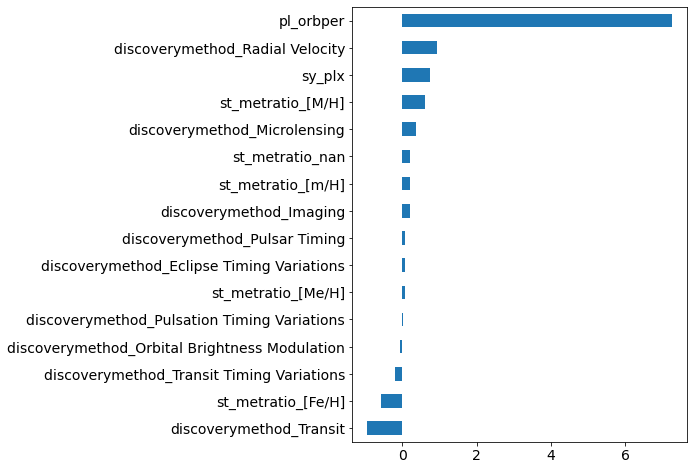

In [180]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 8))
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
coefs.sort_values().plot.barh();

In [181]:
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)

pipeline.fit(X_train, y_train)
print(f'Train accuracy: {pipeline.score(X_train, y_train)}')
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

Train accuracy: 0.8744430943701904
Validation accuracy: 0.7091433778857837


https://pythonprogramminglanguage.com/decision-tree-visual-example/

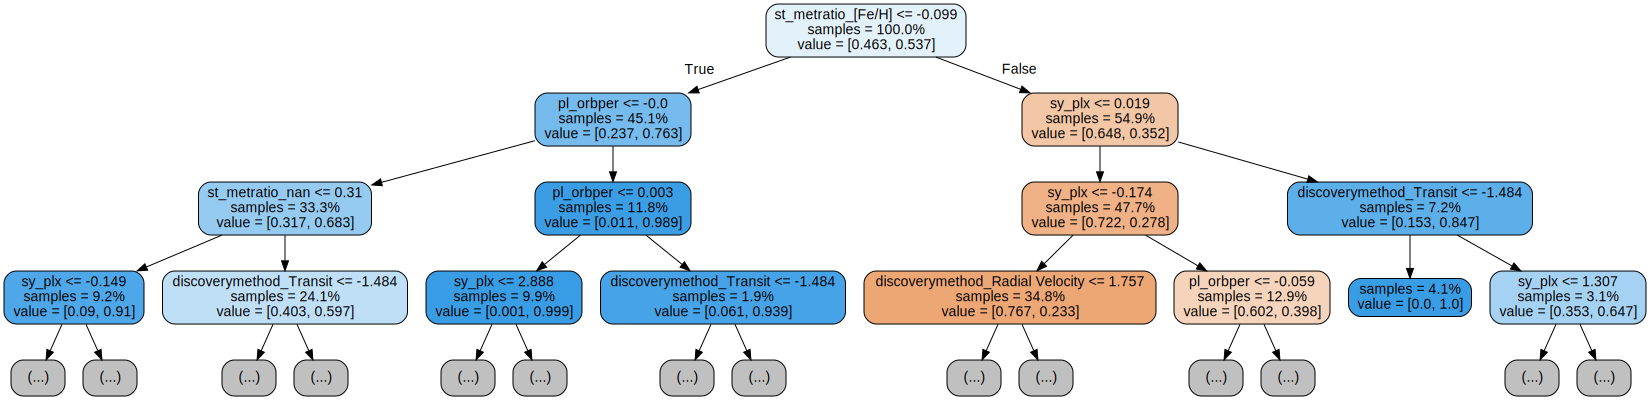

In [182]:
import graphviz
from sklearn.tree import export_graphviz

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

dot_data = export_graphviz(model, 
                           out_file=None, 
                           max_depth=3, 
                           feature_names=encoded_columns, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))

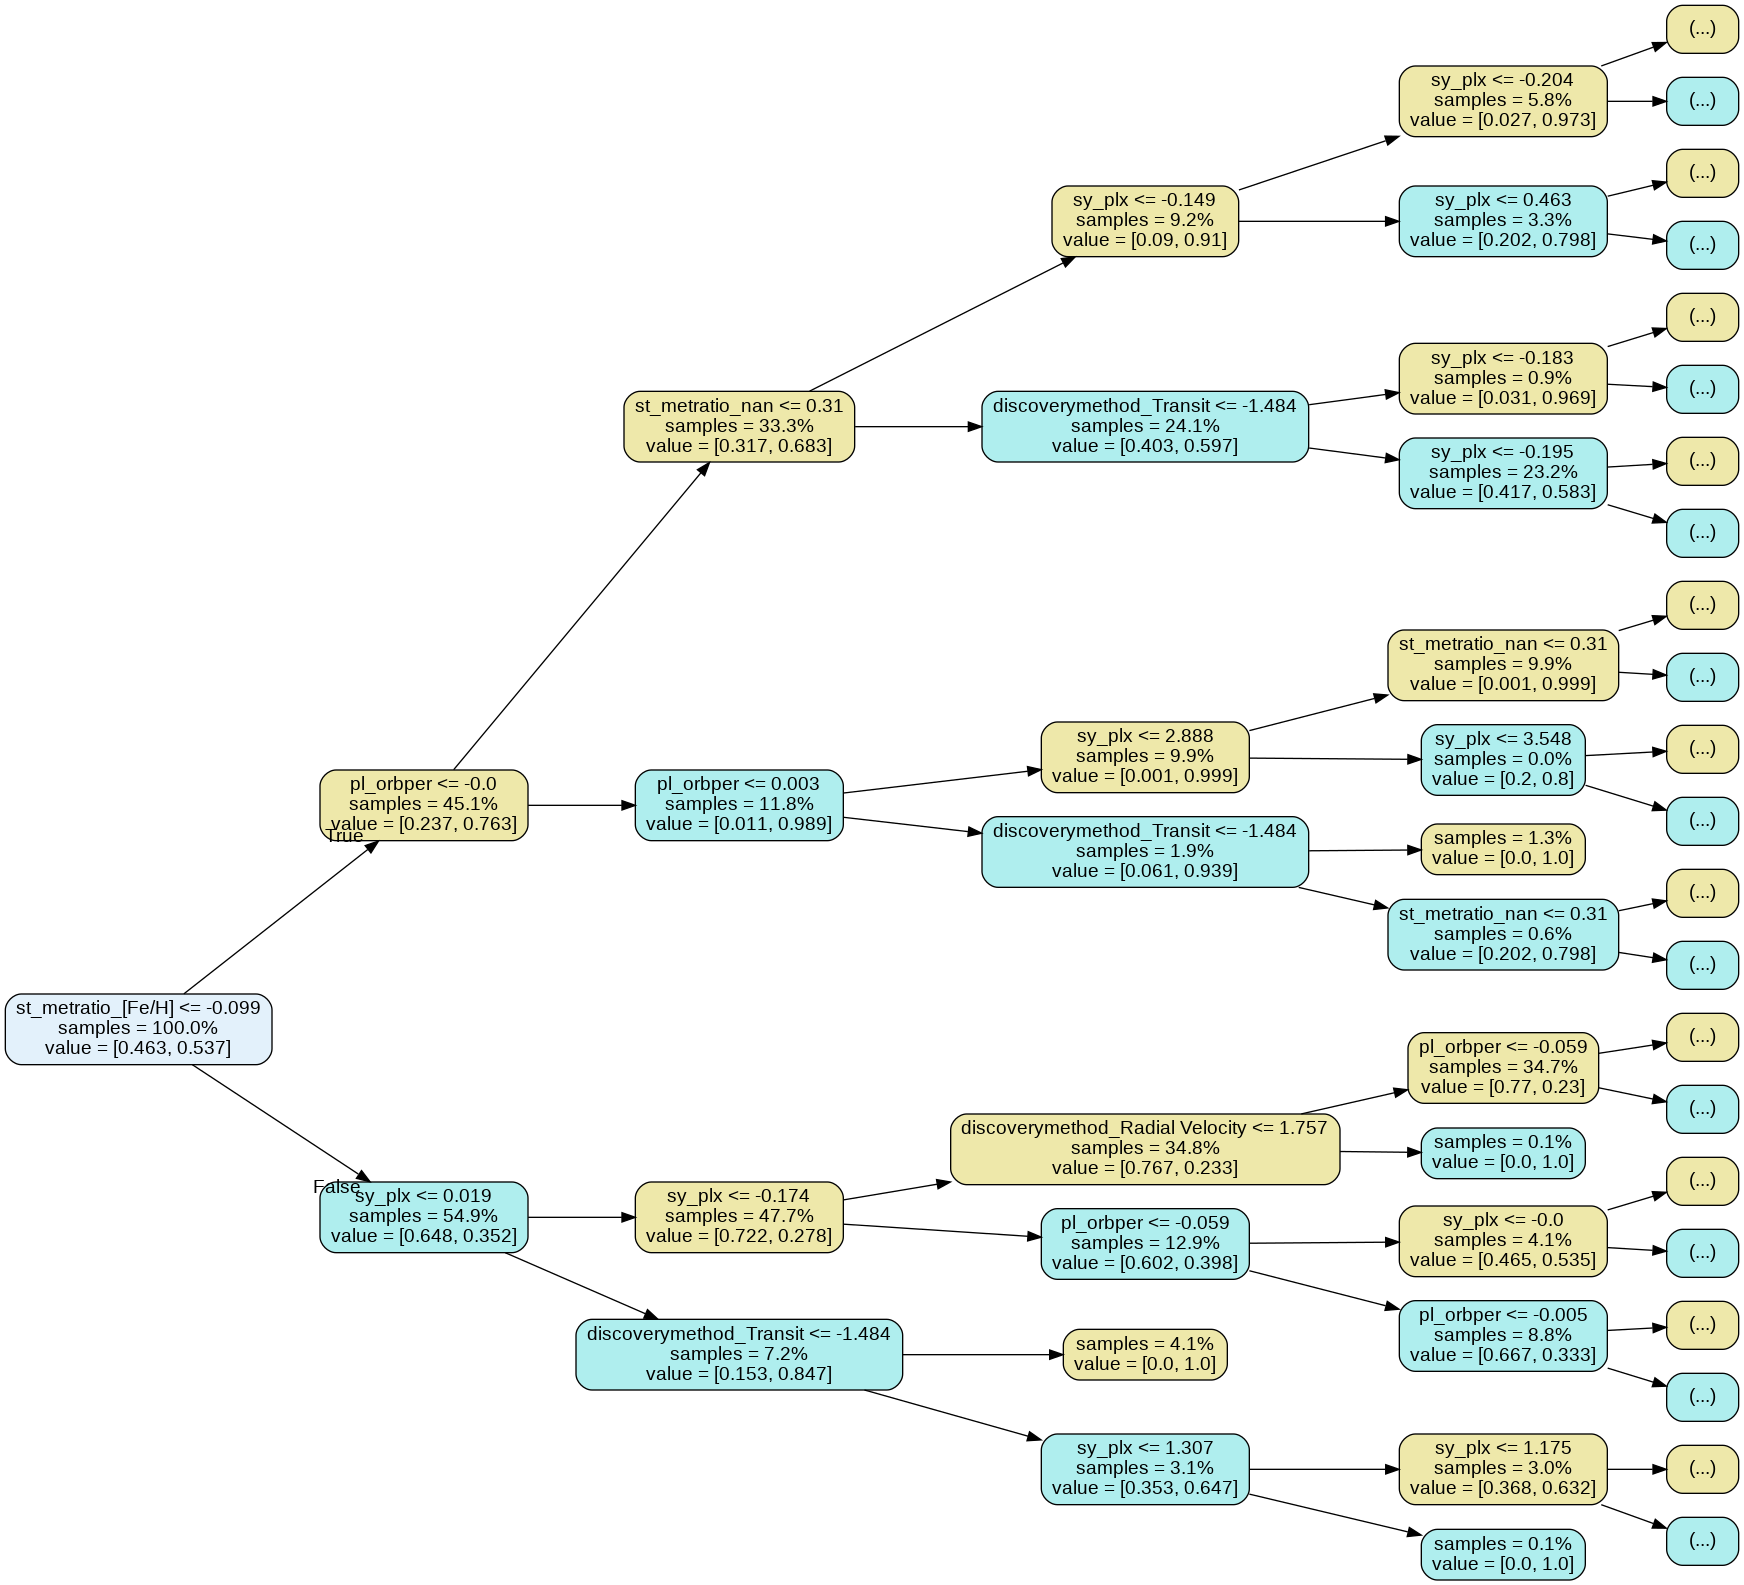

In [183]:
import graphviz
from sklearn.tree import export_graphviz
import collections

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

dot_data = export_graphviz(model, 
                           out_file=None, 
                           max_depth=4, 
                           feature_names=encoded_columns, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True,
                           rotate=True)   
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('palegoldenrod', 'paleturquoise')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

#graph.write_png('tree.png')
# graph.write_pdf("iris.pdf")
Image(graph.create_png())

In [0]:
# import pydotplus
# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('webTree.png')

In [0]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

In [0]:
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [0]:
model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

In [187]:
print(len(encoded_columns))
encoded_columns

16


Index(['pl_orbper', 'sy_plx', 'st_metratio_[Fe/H]', 'st_metratio_nan',
       'st_metratio_[M/H]', 'st_metratio_[m/H]', 'st_metratio_[Me/H]',
       'discoverymethod_Transit', 'discoverymethod_Radial Velocity',
       'discoverymethod_Imaging', 'discoverymethod_Transit Timing Variations',
       'discoverymethod_Microlensing',
       'discoverymethod_Orbital Brightness Modulation',
       'discoverymethod_Eclipse Timing Variations',
       'discoverymethod_Pulsar Timing',
       'discoverymethod_Pulsation Timing Variations'],
      dtype='object')

https://colab.research.google.com/drive/1h-RsZpN44EQ4MKw3YQMf87g86Mi-xllf#scrollTo=9RB5nRd36bOF

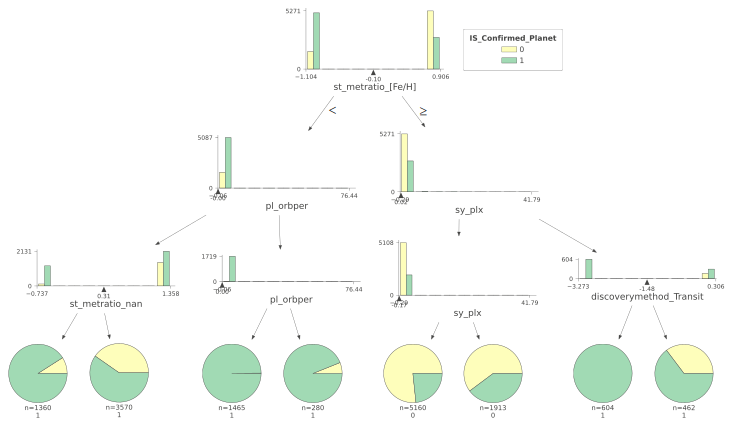

In [141]:
clas = tree.DecisionTreeClassifier(max_depth=3)  
X_train = X_train_scaled
y_train = y_train
clas.fit(X_train, y_train)

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='IS_Confirmed_Planet',
               feature_names=encoded_columns, 
               class_names=[chr(c) for c in range(ord('0'),ord('9')+1)],
               histtype='bar', 
               orientation ='TD')
viz

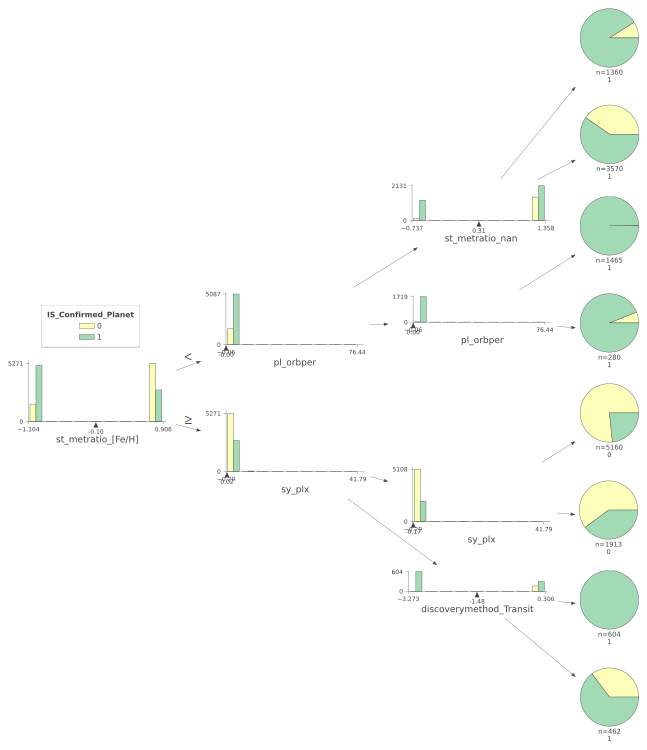

In [171]:
clas = tree.DecisionTreeClassifier(max_depth=3)  
X_train = X_train_scaled
y_train = y_train
clas.fit(X_train, y_train)

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='IS_Confirmed_Planet',
               feature_names=encoded_columns, 
               class_names=[chr(c) for c in range(ord('0'),ord('9')+1)],
               histtype='bar', 
               orientation ='LR')
viz

https://pypi.org/project/svglib/

In [0]:
viz.save("final.svg")

In [168]:
pip install svglib

In [0]:
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF, renderPM

In [0]:
drawing = svg2rlg("final.svg")
renderPDF.drawToFile(drawing, "final.pdf")